# Machine Learning Experiment

by:
- Alson Cahyadi 13514035
- Ramos Janoah 13514089
- Jovian Christianto 13514101

## Task Specification

Jupyter Notebook (http://jupyter.org/ ) memudahkan kita untuk membuat dan men-share dokumen yang merupakan gabungan dari live code, equation, visualisasi dan catatan. Jupyter dapat digunakan untuk visualisasi, pembersihan dan data transformasi, statistical model dan machine learning. Scikitlearn merupakan library machine learning pada bahasa python.

1. Lakukan eksplorasi scikit learn pada Jupiter Netbookdan bacalah dokumentasinya:
    - https://jupyternotebook.readthedocs.io/en/stable/notebook.html
    - http://scikit-learn.org/stable/documentation.html

2. Tulislah script dalam bahasa python pada satu notebook untuk melakukan task berikut ini:
    - Membaca dataset standar iris dan dataset play-tennis (dataset eksternal dalam format csv). Gunakanlah sklearn.datasets untuk membaca dataset standar. Untuk membaca dataset csv, gunakanlah Python Data Analysis Library 
    http://pandas.pydata.org/
    - Melakukan pembelajaran:
        DecisionTree (http://scikit-learn.org/stable/modules/tree.html), 
        dan Artificial Neural Network (http://scikitlearn.org/stable/modules/neural_networks_supervised.html) 
        untuk dataset iris dengan skema full-training, dan menampilkan modelnya.
    - Melakukan pembelajaran DecisionTree, dan ANN untuk dataset iris dengan skema split train 90% dan test 10%, 
        dan menampilkan kinerja serta confusion matrixnya.
    - Melakukan pembelajaran DecisionTree, dan ANN untuk dataset iris dengan skema 10-fold cross validation, 
        dan menampilkan kinerjanya.
    - Menyimpan (save) model/hipotesis hasil pembelajaran ke sebuah file eksternal
    - Membaca (read)model/hipotesis dari file eksternal
    - Membuat instance baru dengan memberi nilai untuk setiap atribut
    - Melakukan klasifikasi dengan memanfaatkan model/hipotesis DecisionTree, dan ANN pada instance pada g.
    - Melakukan analisis fitur dengan visualisasi hubungan setiap fitur dengan kelas. Gunakanlah seaborn (https://seaborn.pydata.org/ ).
4. Tugas dikerjakan berkelompok, dan 1 kelompok terdiri atas 3 mahasiswa (boleh gabungan mahasiswa K1 dan K2). Kelompok yang sama akan digunakan untuk eksperimen.
5. Tugas dikumpulkan berupa file .ipynb dan pdf dengan isi laporan sesuai ketentuan butir tiga. Hanya salah satu anggota kelompok saja yang uplad file tugas pada website ini.
6. Penamaan file yang dikumpulkan: Tucil2_[NIM salah satu anggota].zip (misal: Tucil2_13515001.zip yang berisi Tucil2_13515001.ipynb dan Tucil2_13515001.pdf).
7. Pengumpulan yang terlambat tidak diperbolehkan, batas akhir adalah hari Minggu, 29Oktober 2017 jam 23.59 (waktu situs ini).

### Checking sckit-learn version

In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.18.1.


## Import Library

Imported library: 
    - pandas, untuk import data
    - numpy, untuk memasukan data pada model

In [2]:
import pandas as pd
import numpy as np

## 2a. Reading Dataset
Dataset yang dibaca adalah dataset iris.csv dan tennis.csv

In [3]:
# reading iris
iris = pd.read_csv('data/iris.csv')
# reading tennis
tennis = pd.read_csv('data/tennis.csv')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
tennis.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


## 2b. Full Training

### Preparing the dataset

In [6]:
feature = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].as_matrix()
label = iris['species'].values

feature_name = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

### Decision Tree training for Iris Dataset - Full training

In [7]:
from sklearn import tree

clf_tree_fulltrain = tree.DecisionTreeClassifier()
clf_tree_fulltrain = clf_tree_fulltrain.fit(feature, label)

### Visualizing tree model

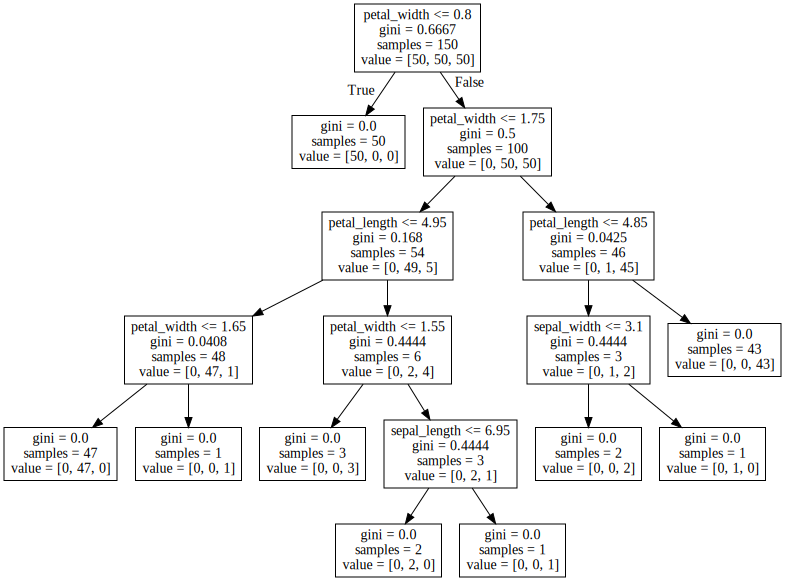

In [8]:
from graphviz import Source
from sklearn import tree
from IPython.display import SVG
Source(tree.export_graphviz(clf_tree_fulltrain, out_file=None, feature_names=feature_name))

### ANN training for Iris Dataset - Full training

In [9]:
from sklearn import neural_network
from sklearn.neural_network import MLPClassifier

clf_nn_fulltrain = MLPClassifier(hidden_layer_sizes=(5,2), max_iter=2000)
clf_nn_fulltrain = clf_nn_fulltrain.fit(feature, label)

### Visualizing ANN Model

In [10]:
clf_nn_fulltrain.coefs_

[array([[  2.11385168e-04,  -1.04818955e-01,   1.83701207e-01,
           1.42553337e-02,   9.59132297e-01],
        [ -2.35123142e-03,  -1.87429514e-02,  -5.06322721e-01,
          -5.22488600e-01,   1.24272077e+00],
        [ -1.14189810e-01,   1.08295348e-04,   1.58849085e+00,
           1.09329445e+00,  -8.45943493e-01],
        [  6.26138712e-03,   1.07444418e-25,   1.18745186e+00,
           4.45315432e-01,  -1.15979389e+00]]),
 array([[ -1.55597306e-02,   3.84511953e-02],
        [ -1.11857429e-01,  -1.30313985e-05],
        [ -9.47971347e-02,  -3.58538330e-01],
        [ -4.82767010e-27,  -4.41871950e-01],
        [ -2.46097708e-02,   7.02760516e-01]]),
 array([[-0.16171142,  0.11391966, -0.22964176],
        [ 1.64196389,  0.06908728,  0.20866815]])]

Array di atas merepresentasikan weight dari MLP Classifier. 
Array pertama melambangkan weight pada input layer. Karena jumlah input = jumlah feature, dan neuron di hidden layer pertama adalah 5, maka array pertama berdimensi 5x2
Array kedua melambangkan weight pada hidden layer pertama ke hidden layer kedua. Karena jumlah neuron layer pertama adalah 5 dan jumlah neuron layer kedua adalah 2, maka dimensinya adalah 2x5
Array ketiga melambangkan weight pada hidden layer kedua ke output layer, berdimensi 2x3 karena class nya berjumlah 3.

## 2c. Split test 

In [11]:
# using previous feature and label
from sklearn.model_selection import train_test_split

feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size = 0.1)

### Decision Tree training for Iris Dataset - Split Test

In [12]:
from sklearn import tree

clf_tree_split = tree.DecisionTreeClassifier()
clf_tree_split.fit(feature_train, label_train)

class_predict = clf_tree_split.predict(feature_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print("Accuracy: " + str(accuracy_score(class_predict, label_test)))
print("Confussion Matrix:")
print(confusion_matrix(class_predict, label_test))

Accuracy: 1.0
Confussion Matrix:
[[4 0 0]
 [0 6 0]
 [0 0 5]]


### ANN training for Iris Dataset - Split Test

In [13]:
from sklearn.neural_network import MLPClassifier

clf_nn_split = MLPClassifier(hidden_layer_sizes=(5,2), max_iter=2000)
clf_nn_split.fit(feature_train, label_train)
class_predict = clf_nn_split.predict(feature_test)

from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(accuracy_score(class_predict, label_test)))
print("Confussion Matrix:")
print(confusion_matrix(class_predict, label_test))

Accuracy: 1.0
Confussion Matrix:
[[4 0 0]
 [0 6 0]
 [0 0 5]]


## 2d. 10-fold cross validation

### Decision Tree training for Iris Dataset - 10-fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

number_of_split = 10

kf = KFold(n_splits = number_of_split)
print(kf)
counter = 0 
sum = 0

for train_index, test_index in kf.split(feature):
    #print("TRAIN:", train_index, "TEST:", test_index)
    clf_tree_10fold = tree.DecisionTreeClassifier()
    clf_tree_10fold.fit(feature[train_index], label[train_index])    
    label_predict = clf_tree_10fold.predict(feature[test_index])
    #print(label_predict)
    #print(label[test_index])
    counter += 1
    print("Accuracy " + "(fold " + str(counter) + ") : " + str(accuracy_score(label_predict, label[test_index])))
    sum += accuracy_score(label_predict, label[test_index])
    
print("Average Accuracy : " + str(sum/number_of_split))


KFold(n_splits=10, random_state=None, shuffle=False)
Accuracy (fold 1) : 1.0
Accuracy (fold 2) : 1.0
Accuracy (fold 3) : 1.0
Accuracy (fold 4) : 0.933333333333
Accuracy (fold 5) : 0.933333333333
Accuracy (fold 6) : 0.866666666667
Accuracy (fold 7) : 1.0
Accuracy (fold 8) : 0.866666666667
Accuracy (fold 9) : 0.733333333333
Accuracy (fold 10) : 1.0
Average Accuracy : 0.933333333333


### ANN training for Iris Dataset - 10-fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

number_of_split = 10

kf = KFold(n_splits = number_of_split)
print(kf)
counter = 0 
sum = 0

for train_index, test_index in kf.split(feature):
    #print("TRAIN:", train_index, "TEST:", test_index)
    clf_nn_10fold = MLPClassifier(hidden_layer_sizes=(5,2), max_iter=2000)
    #print(feature[train_index], label[train_index])

    clf_nn_10fold.fit(feature[train_index], label[train_index])
    label_predict = clf_nn_10fold.predict(feature_test)
    
    counter += 1
    print("Accuracy " + "(fold " + str(counter) + ") : " + str(accuracy_score(label_predict, label[test_index])))
    sum += accuracy_score(label_predict, label[test_index])
    
print("Average Accuracy : " + str(sum/number_of_split))

KFold(n_splits=10, random_state=None, shuffle=False)


/home/ramosjanoah/anaconda2/envs/env_py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy (fold 1) : 0.266666666667


## 2e. Save Model

In [ ]:
from sklearn.externals import joblib
    
def saveModel(clf, filename):
    joblib.dump(clf, filename) 
    print("Model have been saved to " + filename)

    
saveModel(clf_nn_split, 'model1.pkl')    

## 2f. Load Model

In [ ]:
from sklearn.externals import joblib

def loadModel(filename):
    print("Load model from " + filename)
    clf = joblib.load(filename) 
    return clf

model = loadModel('model1.pkl')
print(model)

## 2g. Create New Instance

Creating new instance dapat dilakukan dengan membuat array yang panjangnya sesuai dengan feature yang digunakan oleh model serta tipe data yang sama. Pada kasus ini, data iris menggunakan 4 fitur yang semua tipe datanya adalah numeric.

In [ ]:
#creating new instance

g = [5, 3.5, 1, 1]

## 2h. Classification

In [ ]:
y_tree = clf_tree_fulltrain.predict([g])
y_nn = clf_nn_fulltrain.predict([g])
print(y_tree)
print(y_nn)

## 2i. Feature Analysis using Python

In [ ]:
iris.head()

In [ ]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

for fea in feature_name:
    print("Plotting " + fea + " with Species")
    sns.stripplot(x=fea,y='species', data=iris, jitter=True)
    sns.plt.show()
    print("\n")